In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = load_iris()
X = data.data
y = data.target


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 99)

In [4]:
clf = DecisionTreeClassifier(random_state=1)

In [5]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [6]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9555555555555556


In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}

tree = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid,
                           cv=5, verbose=True)
grid_search.fit(X_train, y_train)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 0.9714285714285715
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=1)


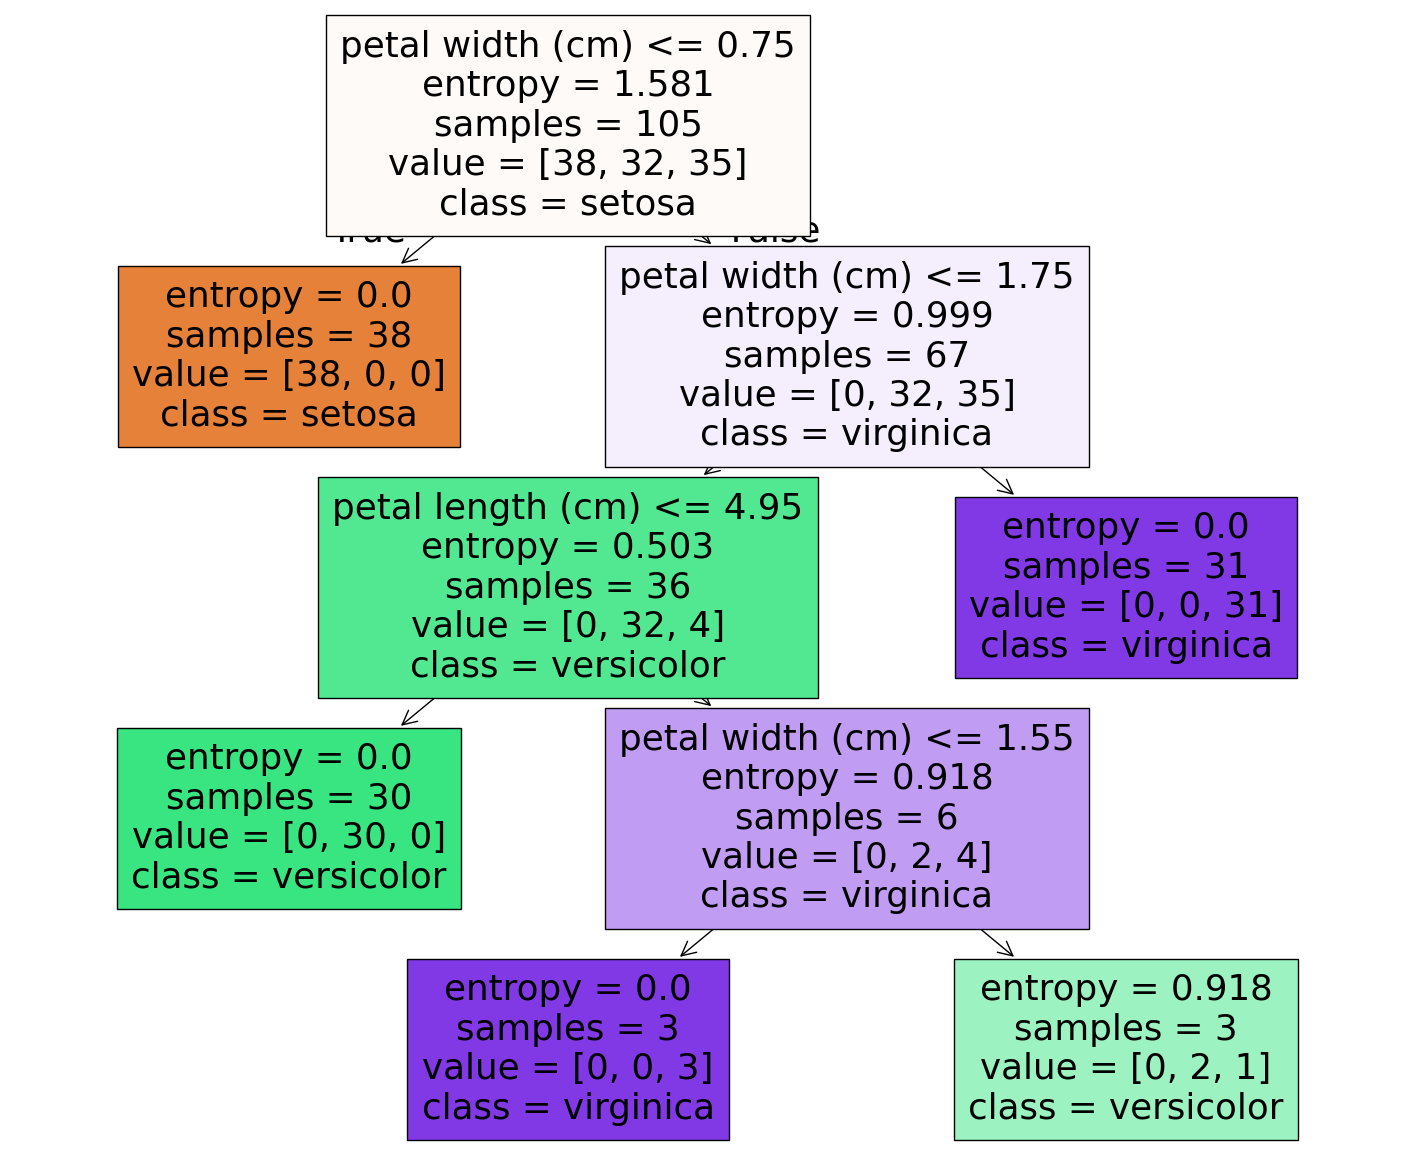

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_clf = grid_search.best_estimator_

plt.figure(figsize=(18, 15))
plot_tree(tree_clf, filled=True, feature_names=data.feature_names,
          class_names=data.target_names)
plt.show()